# User analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this part, we will do user analysis in the following aspects:

__1)__ The distribution of reviews' quantity by year, month, date.

__2)__ The distribution of reviews' stars by the "eliteness" of customers. The Yelp Elite is Yelp's way of recognizing people who are active in the Yelp community and role models on and off the Yelp site. Elite-worthiness is based on a number of things, including well-written reviews, high quality photos, a detailed personal profile, and a history of playing well with others. The more years of elite a user is, the more active and appealing it is on this platform. (https://www.yelp-support.com/article/What-is-Yelps-Elite-Squad?l=en_US)

__3)__ KPI analysis: Returning Feedback Provider Rate. The idea of this rate is based on the returning visitors rate. Because we don't have information for customer orders, so we can't tell repeat customers exactly. Returning feedback provider is who ever gave more than one review to this restaurant. These kind of customers must be loyal and take important roles to attract more customers on Yelp.

__4)__ The distribution  of review providers' Yelp seniority. Yelp seniority is how many years people use Yelp. Because this restaurant has been open more than 10 years, by investigating this kind distribution, we could see whether this restaurant keep a good interaction with Yelp during the past.

__5)__ KPI analysis: Influencer Rate. Every social media platform has influencer, like Instagram, Facebook, Twitter and Yelp. Sometimes the power of influencer is across-platform. Influencers generally have has thousands or even millions of fans and close cooperation with different brands on social media. We try to figure out whether this restaurant ever attracted some Yelp Influencers and gained their positive feedbacks.

## Data preparation

Open both review file and user file. 

__Note__: Because both the user file and review file are too large, more than 5 GB, so we use a sub-data of review dataset by choose the city and restaurant type and we only pick users who used to give feedbacks to this restaurant.

In [2]:
Review=pd.read_csv("toronto_japanese_reviews.csv")

In [3]:
data_review=Review[Review['business_id']=='RtUvSWO_UZ8V3Wpj0n077w']

In [4]:
user_list=data_review['user_id'].unique().tolist()

In [5]:
data_user=pd.read_csv("User files of RtUvSWO_UZ8V3Wpj0n077w.csv")

## The distribution of reviews' quantity by year, month, date.

In [6]:
data_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
38953,vmbSnHypqNnS-_OAf2qhQQ,I0ovidZUTV9A5LPIMz0I4Q,RtUvSWO_UZ8V3Wpj0n077w,3.0,1,0,1,"Very, very loud (but that is what an Izakaya e...",2017-04-19 13:55:23
38956,3i-SwTJPdr8SMp3BUu4lew,tBnTi-2Ld8AcNB-PD3S4eQ,RtUvSWO_UZ8V3Wpj0n077w,4.0,2,1,1,Am I going to say this is the best restaurant ...,2012-08-15 02:10:00


In [7]:
data_review['date']=pd.to_datetime(data_review['date']);
data_review['year']=data_review['date'].dt.year;
data_review['month']=data_review['date'].dt.month;
data_review['weekday']=data_review['date'].dt.weekday;

C:\Users\li_xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\li_xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\li_xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In this part, we have a look at the general distribution of feedbacks no matter they are positive or negetive. The period this dataset covers is from 2009 to 2019.

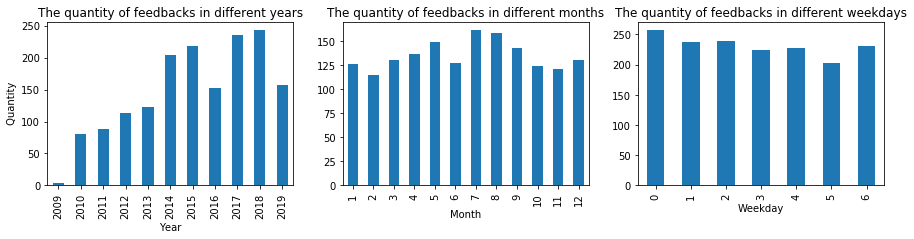

In [8]:
plt.subplot(131)
ax=data_review.groupby('year')['text'].count().plot.bar(figsize=(15,3))
plt.title('The quantity of feedbacks in different years');
plt.xlabel("Year");
plt.ylabel(" Quantity");

plt.subplot(132)
ax=data_review.groupby('month')['text'].count().plot.bar()
plt.title('The quantity of feedbacks in different months');
plt.xlabel("Month");

plt.subplot(133)
ax=data_review.groupby('weekday')['text'].count().plot.bar()
plt.title('The quantity of feedbacks in different weekdays');
plt.xlabel("Weekday");

__Conclusion:__

Basically there is an upward trend in quantities of feedbacks by year, but why 2016 and 2019 didn't follow the pattern strictly need to be noticed, especially the drop in 2019. Does it mean the restaurant became less popular? This might be a potential problem.

Shown by the visualization, here are more feedbacks in summer(July and August) than winter(November, December, January and February) and more on Sunday than other days.

Next, we want to have a look at how the mean star of feedbacks changed during the past years.

year
2009    3.250000
2010    3.975000
2011    4.193182
2012    4.175439
2013    4.065574
2014    4.098039
2015    4.174312
2016    4.117647
2017    4.131915
2018    4.279835
2019    4.006369
Name: stars, dtype: float64


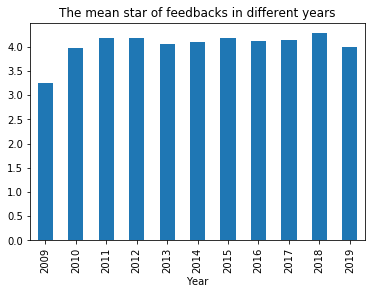

In [12]:
plt.subplot()
ax=data_review.groupby('year')['stars'].mean().plot.bar()
plt.title('The mean star of feedbacks in different years');
plt.xlabel("Year");
print(data_review.groupby('year')['stars'].mean())

__Conclusion:__

In 2019, the averaged star dropped to the lowest level since 2010.

In the next we plan to investigate the change of quantities of reviews at different star level to see whether the positive feedbacks increased gradually?

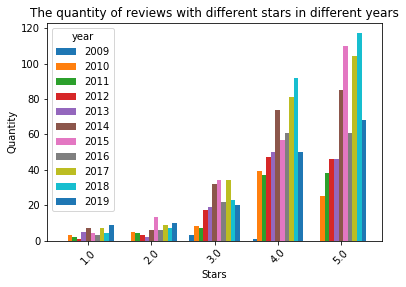

In [14]:
data_review.groupby(['year','stars'])['text'].count().unstack().T.plot.bar(width=0.8)
plt.xticks(rotation=45)
plt.xlabel("Stars")
plt.ylabel('Quantity')
plt.title('The quantity of reviews with different stars in different years');

__Conclusion:__

The mainstream of reviews are those higher than 3.0 which is a good thing, but if look at it closely, quantities 4.0 and 5.0 reduced a lot in 2009 which is a  worrying trend to this restaurant's operation.

# The distribution of reviews' stars by the "eliteness" of customers.

In [16]:
data_user['elite']=data_user['elite'].astype(str)

In [17]:
data_user['elite years']=data_user['elite'].apply(lambda x:len(x.split(',')))

In [18]:
data_user.head(2)

,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite years
0,213,MFnXQb1R1IGLL_-W4oflJw,Angie,374,2009-05-06 05:16:01,941,275,542,"2009,2010,2011,2012,2013","djpMXOA1ic5wv3FPtubHNw, UOMSN12IGpju4sKwIJQE_Q...",...,4,18,0,43,63,84,84,57,17,5
1,255,LhFzr2vZDEc2KNHxuiHtIw,Cat,1639,2009-12-11 06:58:09,8349,3675,4590,"2010,2011,2012,2013,2014,2015,2016,2017,2018","zYlTuY9teqQOrrZq1pXcxw, LV0tWvAuDUkjNhfrhj5JFQ...",...,10,35,0,365,436,508,508,174,94,9


Eliteness distrubution: (array([1164,  115,   94,   68,   52,   22,   26,   17,   23,   11],
      dtype=int64), array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]))


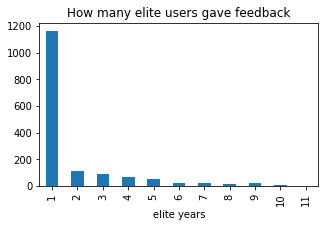

In [24]:
data_user.groupby('elite years')['elite'].count().plot.bar(figsize=(5,3));
plt.title('How many elite users gave feedback')
print("Eliteness distrubution:",np.histogram(data_user['elite years']))

We could see most feedbacks are provided by low-level-eliteness users and the quantities decreased as the level of eliteness increased. This situation makes sense because most Yelp users are just normal users. A good thing the restaurant used to attract some very elite users to provide feedbacks. Generally, high-level elite users have bigger influences in social media. Sometimes they are even powerful enough to lead word of mouth of a business. Therfore, the feedbacks from this group need more attention.

Then investigate when the restaurant gained these elite user's feedbacks and how them were, positive or negative. Here we define a user as a high-level-elite user if it was elite in morn than 5 or 5 years in the past and use their user_id to map their feedback in the data_review file.

In [25]:
elite=data_user[data_user['elite years']>4].user_id.astype(str)

In [26]:
data_review[data_review['user_id'].isin(elite)]['stars'].describe()

count    163.000000
mean       4.128834
std        0.762932
min        2.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: stars, dtype: float64

We can see most feedbacks from top elites users are very positive, but only some are below 4. First, we want to know how many of them separately. Then we apply text analysis to negative ones to investigate the reasons.

In [27]:
data_review_bad_elite=data_review[(data_review['user_id'].isin(elite)) & (data_review['stars']<4)]

In [33]:
data_review_bad_elite

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,weekday,text_clean
39037,YHslAkL2HE0ldFBm9XaK9g,MFnXQb1R1IGLL_-W4oflJw,RtUvSWO_UZ8V3Wpj0n077w,3.0,8,8,7,A Guu in Toronto! I can't quite believe it's f...,2010-01-08 20:53:18,2010,1,4,guu toronto quite believe finally reality vanc...
39442,OGR-oPrCdRwoJu5pFWzc4w,VHc1yqBhsE-l3JQFXuWydQ,RtUvSWO_UZ8V3Wpj0n077w,3.0,1,1,1,This place was cool for novelties sake. When y...,2012-11-08 11:01:13,2012,11,3,place cool novelty sake enter door staffcooks ...
39828,chV-STwsxw1rxozO_0PsBw,J4l4Rn13-3Hjb_J-Ntgd9g,RtUvSWO_UZ8V3Wpj0n077w,3.0,0,0,0,"Awesome food and atmosphere, service was a lit...",2013-08-05 12:37:33,2013,8,0,awesome food atmosphere service little lacking...
40359,uBcC3j0NAhDow-2y2nnQJg,MbC0xPzIdGkFMCpPb8yWDA,RtUvSWO_UZ8V3Wpj0n077w,3.0,4,2,2,"For Guu, I am torn between giving it 3-stars o...",2011-07-01 22:36:00,2011,7,4,guu torn giving 3stars 4stars ambiance great f...
40441,3Q00gNw8c4VSa68qtmfLag,Kj9cFO70zZOQorN0mgeLWA,RtUvSWO_UZ8V3Wpj0n077w,3.0,1,0,0,3.5 STARS\n\nIt's a really good restaurant - n...,2016-10-16 17:38:35,2016,10,6,35 star really good restaurant nice food expen...
40797,PxvR_Gy1WwfeZBo29nHm6A,PGx4HvY5joEeqXzam6tO7A,RtUvSWO_UZ8V3Wpj0n077w,3.0,1,0,0,I was happy with the food for my second experi...,2013-08-20 02:58:12,2013,8,1,happy food second experience happy reservation...
40914,Y4TNHLxHBBwN3YvKjF3ZuQ,Ofj4dQb8FOA1ukRbDjITmw,RtUvSWO_UZ8V3Wpj0n077w,3.0,0,0,1,I thought this place was just okay. I came on...,2015-04-07 02:04:50,2015,4,1,thought place just okay came saturday 9 pm par...
40917,pMTmHVcf19C-yipd4IHmpw,Q9mA60HnY87C1TW5kjAZ6Q,RtUvSWO_UZ8V3Wpj0n077w,3.0,8,14,2,Grandma alert! Grandma alert!\n\nI remember ba...,2014-04-07 13:39:06,2014,4,0,grandma alert grandma alert remember 2010 izak...
41000,LIrO-BzpKjyntJR10LpZUQ,P2E31XC7SP4v_3hXC2o0Xw,RtUvSWO_UZ8V3Wpj0n077w,3.0,4,3,4,About a 3.5. I still feel the place is a bit o...,2010-12-10 15:41:28,2010,12,4,35 feel place bit overrated theyre really luck...
41007,smSj3dMCDE9tCsDaPpTWTw,i6V3NyTdkBVwPpH7r2BINA,RtUvSWO_UZ8V3Wpj0n077w,3.0,1,1,1,This place is fun. Lots of yelling; it seems l...,2012-09-17 01:36:18,2012,9,0,place fun lot yelling like fun place work food...


In [29]:
print("Negative reviews from top-elite users:",len(data_review_bad_elite))
print("Psitive reviews from top-elite users:",len(data_review[(data_review['user_id'].isin(elite)) & (data_review['stars']>3)]))

Negative reviews from top-elite users: 34
Psitive reviews from top-elite users: 129


C:\Users\li_xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


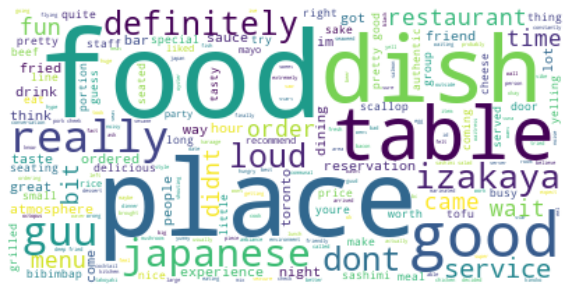

In [32]:
from nltk.stem import WordNetLemmatizer
import nltk 
from sklearn.feature_extraction import stop_words
import string

lemmatizer = WordNetLemmatizer()

def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split()                       
                     if w not in stop_words.ENGLISH_STOP_WORDS])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])   
    return text


data_review_bad_elite['text_clean']=data_review_bad_elite['text'].apply(text_processing)

negative_elite=data_review_bad_elite['text_clean']

negative_wordcloud=""        
for i in negative_elite:
    negative_wordcloud=negative_wordcloud+str(i)
    from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="white").generate(negative_wordcloud)  
    
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")
plt.show();

Feedbacks from top elite users need more attention due to they are more active than regular Yelp users and could influence others by sharing a post or review of a restaurant.

__Conclusin:__

__1)__ The wordcloud analysis shows some possible problems in their operation, for example, noisy environment, the portion of dish and long wait time, etc. But we could also see most of these negative feedbacks were given many years ago, even the nearest one was in 2016. Therefore we think maybe these problems have been solved and won't threaten the present operation of this restaurant. 

__2)__ And considerations there are only 34 negative feedbacks from top elite users compared with 129 positive feedbacks during the past 10 years, we conclude this restaurant did well overall. 

__3)__ But one thing to address, this analysis shows that this restaurant didn't attract enough top-elite users to write online feedbacks. Top-elite Yelp users sometimes could be a good advertisement but cost no advertisement fee which could be a great deal.

## KPI analysis: Returning Feedback Provider Rate

In [40]:
print("Total amount of feedbacks;",len(data_review))
print("Feedbacks from different user_id:",len(data_review['user_id'].unique()))
print("Returning visitors rate: ;","{:.2%}".format(1-len(data_review['user_id'].unique())/len(data_review)))

Total amount of feedbacks; 1618
Feedbacks from different user_id: 1592
Returning visitors rate: ; 1.61%


__Conclusion:__

Unfortunately the restaurant doesn't have many feedbacks from the same user IDs. This gives a hint that the restaurant could make some marketing activities or discount aimed at returning customers to attract them to write more reviews online. For example, they could issue some special vouchers to old customers and encourage them to come back again. This is a helpful way to increase brand loyalty.

## The distribution  of review providers' Yelp seniority

In [41]:
data_user['yelping_since']=data_user['yelping_since'].apply(pd.to_datetime)                                                                                                                                      

In [42]:
data_user['yelp age']=2019-data_user['yelping_since'].dt.year

In [43]:
data_user.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite years,yelp age
0,213,MFnXQb1R1IGLL_-W4oflJw,Angie,374,2009-05-06 05:16:01,941,275,542,"2009,2010,2011,2012,2013","djpMXOA1ic5wv3FPtubHNw, UOMSN12IGpju4sKwIJQE_Q...",...,18,0,43,63,84,84,57,17,5,10
1,255,LhFzr2vZDEc2KNHxuiHtIw,Cat,1639,2009-12-11 06:58:09,8349,3675,4590,"2010,2011,2012,2013,2014,2015,2016,2017,2018","zYlTuY9teqQOrrZq1pXcxw, LV0tWvAuDUkjNhfrhj5JFQ...",...,35,0,365,436,508,508,174,94,9,10
2,364,Kj9cFO70zZOQorN0mgeLWA,Faiza,950,2010-06-27 13:47:11,1911,503,1415,"2014,2015,2016,2017,2018","2n4Aj2Jfe7eN5cZx1Z43XA, AOrGE-Ry3_Psr2jTTfvKlw...",...,4,1,64,114,206,206,81,34,5,9
3,382,lBIfa3INjAj_z2_amlnq3w,Diane,1157,2010-11-23 14:08:08,1323,432,386,"2012,2013,2014,2015,2016,2017,2018","5SP390_Y7IMc9eqlMorIOQ, JVyj3mXKVRa5Mpnrj4x_wA...",...,1,1,19,35,20,20,13,10,7,9
4,425,Tj-6FX0ZnqHEZYO9iFSD4w,Zebra,207,2009-06-08 12:11:10,1935,1967,1594,"2009,2010,2011","6I042PLRiYub7RvufcqjZQ, hqmnMdDS-Opjp3BfBJA8qA...",...,57,39,215,1029,458,458,248,90,3,10


We want to analyze the percentage of users with different Yelp seniority, here do we use an interactive visualization tool to show it.

In [251]:
pip install pyecharts==0.5.11  

In [49]:
user_agelevel=data_user['yelp age'].value_counts().reindex(range(len(data_user['yelp age'].unique())))
from pyecharts import Pie
pie=Pie("Customers' Yelp seniority",title_pos="center",width=900)
pie.add("Ages distribution",["Yelp age "+str(i) for i in range(len(data_user['yelp age'].unique()))],user_agelevel.values,is_random=True,radidus=[30,45],legend_pos='left',rosetype='area',legend_orient='vertical',is_label_show=True,label_text_size=20)
pie

__Conclusion:__

Most customers of the restaurant are at medium Yelp seniority. One noticeable thing is that there are more fresh Yelp users (low Yelp seniority) than advanced Yelp users(high Yelp seniority), which means the restaurant did a good job to attract fresh-guy on Yelp but they omitted to attract advanced users. Therefore we think this restaurant should have closer cooperation with social media platforms and exploit the advanced users' value in marketing events. 

This conclusion inspires us to do the influencer rate analysis below.

## KPI analysis: Influencer Rate

First we have a look of all users who used to provide reviews to this restaurant and use their user_id to retrive their user file.

In [50]:
user_list=data_review['user_id'].unique().astype(str)

In [51]:
data_user_related=data_user[data_user['user_id'].isin(user_list)].sort_values(by=['fans'],ascending=False)

In [52]:
data_user_related=data_user_related.drop(["Unnamed: 0","name","friends","elite","elite years"],axis=1)

In [53]:
data_user_related.head(2)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp age
36,jt49xjEjQisu6wTTGn6B3A,1727,2010-07-01 22:09:09,15962,5064,10936,857,4.25,463,80,45,70,34,828,4837,1273,1273,423,448,9
42,CxDOIDnH8gp9KXzpBHJYXw,6633,2009-11-09 20:44:45,22711,9242,14486,789,3.33,734,190,38,68,92,1366,3726,1653,1653,458,1543,10


We could see here, some users who gave feedbacks in the past really have lots of fans. Although by looking at the original user file, there are some users who own more than 1000, 2000 and highest more than 3000 fans, and no users in this case own that many. But based on life experience a user who owns more than 200 fans in a platform could be thought of as popular.

Then we plan to see whether these popular users on Yelp gave negative feedbacks to this restaurant.

In [54]:
print("How many Influencers does this restaurant have:",len(data_user_related[data_user_related['fans']>200]))

How many Influencers does this restaurant have: 12


In [55]:
user_list_2=data_user_related[data_user_related['fans']>200]['user_id'].astype(str)

In [56]:
data_review[(data_review['user_id'].isin(user_list_2))& (data_review['stars']<4 )]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,weekday
40917,pMTmHVcf19C-yipd4IHmpw,Q9mA60HnY87C1TW5kjAZ6Q,RtUvSWO_UZ8V3Wpj0n077w,3.0,8,14,2,Grandma alert! Grandma alert!\n\nI remember ba...,2014-04-07 13:39:06,2014,4,0
44414,6kRTVF6MXgyfhukk_3GakA,JesJ-LaNfr3pKhL7gWhDrw,RtUvSWO_UZ8V3Wpj0n077w,3.0,8,1,2,"#1 best izakaya in the GTA apparently, and I c...",2014-10-16 02:46:59,2014,10,3
47085,N696UJmoL7H1kdBGOHy-QQ,2esyx8s04Vrde3Pn8GMNsQ,RtUvSWO_UZ8V3Wpj0n077w,2.0,6,8,3,GUU-dness gracious!!!! We made a reservation m...,2015-07-06 12:02:59,2015,7,0


We could see, there are 12 influencers this restaurant has, and 3 of them used to give negative feedbacks. The business always should care more about how influencer write their feedbacks than regular users because they have lots of fans and their feedbacks can be browsed by their network which means the effect of that negative feedback is largen. The restaurant always should have a good relationship with this group of users.

In [57]:
print("Influencer rate:","{:.2%}".format(len(data_user_related[data_user_related['fans']>200])/len(data_user_related)))

Influencer rate: 0.75%


__Conclusion:__

Sadly, this rate is low. As we explained before, this restaurant doesn't gain top influencers on the Yelp platform, hence in the future the restaurant should seek cooperation with more powerful Yelp influencers and gain their recommendation as much as possible.
